In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import os

df_cursos = pd.read_csv(os.path.join(os.getcwd(), "microdados", "CADASTRO_CURSOS_2020.csv"), encoding='ISO-8859-1', sep=';', low_memory=False)

display(df_cursos.head(5))

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,MAT_APOIO_SOCIAL,CONC_APOIO_SOCIAL,ATIV_EXTRACURRICULAR,ING_ATIV_EXTRACURRICULAR,MAT_ATIV_EXTRACURRICULAR,CONC_ATIV_EXTRACURRICULAR,MOB_ACADEMICA,ING_MOB_ACADEMICA,MAT_MOB_ACADEMICA,CONC_MOB_ACADEMICA
0,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


Mostrar áreas de conhecimentos nos dados

In [81]:
df_cursos.NO_CINE_AREA_GERAL.unique()

array(['Educação', 'Negócios, administração e direito',
       'Computação e Tecnologias da Informação e Comunicação (TIC)',
       'Saúde e bem-estar', 'Serviços',
       'Engenharia, produção e construção', 'Artes e humanidades',
       'Agricultura, silvicultura, pesca e veterinária',
       'Ciências sociais, comunicação e informação',
       'Ciências naturais, matemática e estatística', 'Programas básicos'],
      dtype=object)

In [82]:
df_cursos.NO_CINE_AREA_ESPECIFICA.unique()

array(['Educação', 'Negócios e administração',
       'Computação e Tecnologias da Informação e Comunicação (TIC)',
       'Saúde', 'Serviços de segurança', 'Direito',
       'Engenharia e profissões correlatas', 'Serviços pessoais',
       'Humanidades (exceto línguas)', 'Produção e processamento',
       'Agricultura', 'Bem-estar', 'Comunicação e informação', 'Artes',
       'Ciências sociais e comportamentais',
       'Ciências biológicas e correlatas', 'Ciências físicas',
       'Higiene e serviços de saúde ocupacional',
       'Arquitetura e construção',
       'Programas interdisciplinares abrangendo ciências naturais, matemática e estatística',
       'Matemática e estatística', 'Serviços de transporte', 'Línguas',
       'Veterinária', 'Programas interdisciplinares abrangendo educação',
       'Programas interdisciplinares abrangendo negócios, administração e direito',
       'Silvicultura',
       'Programas interdisciplinares abrangendo computação e Tecnologias da Informação 

Usando a coluna "Nome da Área Geral" para filtrar somente os cursos de "engenharia" na área de **Engenharia, Produção e Construção**.

In [83]:
df_cursos_eng = df_cursos[df_cursos["NO_CINE_AREA_GERAL"] == 'Engenharia, produção e construção'] 

In [84]:
df_cursos_eng.NO_CINE_AREA_ESPECIFICA.unique()

array(['Engenharia e profissões correlatas', 'Produção e processamento',
       'Arquitetura e construção',
       'Programas interdisciplinares abrangendo engenharia, produção e construção'],
      dtype=object)

Agrupar a coluna "NO_CINE_AREA_ESPECIFICA" com a coluna "NO_UF" para organizar os dados de acordo com os estados.

In [96]:
# Primeiro, filtre os cursos de "Educação"
df_cursos_educacao = df_cursos[df_cursos["NO_CINE_AREA_ESPECIFICA"].str.contains('Educação')]
df_cursos_educacao = df_cursos_educacao[~df_cursos_educacao['NO_REGIAO'].isin(['Distância', 'Exterior'])]

# Em seguida, agrupe os dados por região (NO_REGIAO)
contagem_cursos_por_regiao = df_cursos_educacao.groupby('NO_REGIAO')['NO_CINE_AREA_ESPECIFICA'].count()

display(contagem_cursos_por_regiao)

NO_REGIAO
Centro-Oeste     7644
Nordeste        16804
Norte            7331
Sudeste         33567
Sul             18520
Name: NO_CINE_AREA_ESPECIFICA, dtype: int64

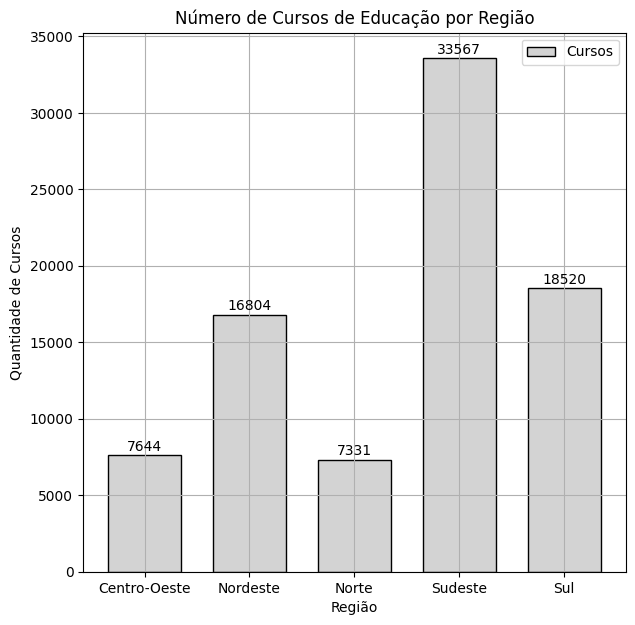

In [100]:
plt.bar(contagem_cursos_por_regiao.index, contagem_cursos_por_regiao.values, color='lightgray', width=0.7, edgecolor='black')

plt.title('Número de Cursos de Educação por Região')

plt.xlabel('Região')
plt.ylabel('Quantidade de Cursos')

plt.grid(True)

plt.legend(['Cursos'])

for i, j in zip(contagem_cursos_por_regiao.index, contagem_cursos_por_regiao.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),
        textcoords='offset points',
        ha='center',
        va='bottom',
    )

plt.show()